In [8]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Korean_Lottery.csv')

In [10]:
new_header = df.iloc[1] #grab the first row for the header
df = df[2:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.iloc[:,2:] #gets rid of the years since its duplicate information
df = df.rename({df.columns[0]:'Date','1등 당첨자수':'# of 1st Place Winners','2등 당첨자수':'# of 2nd Place Winners', #renames columns from Korean to English
          '3등 당첨자수':'# of 3rd Place Winners', '4등 당첨자수':'# of 4th Place Winners',
          '5등 당첨자수':'# of 5th Place Winners', '1등 당첨금액':'1st Place Prize',
          '2등 당첨금액':'2nd Place Prize', '3등 당첨금액':'3rd Place Prize',
          '4등 당첨금액':'4th Place Prize', '5등 당첨금액':'5th Place Prize',
          '1':'1st Ball', 2.0:'2nd Ball', 3.0:'3rd Ball', 4.0:'4th Ball', 5.0:'5th Ball', 6.0:'6th Ball','보너스':'Bonus Ball'},axis='columns')

df['1st Place Prize'] = df['1st Place Prize'].str[:-1]
df['2nd Place Prize'] = df['2nd Place Prize'].str[:-1]
df['3rd Place Prize'] = df['3rd Place Prize'].str[:-1]
df['4th Place Prize'] = df['4th Place Prize'].str[:-1]
df['5th Place Prize'] = df['5th Place Prize'].str[:-1]

df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.sort_values('Date', ascending=True)
df = df.reset_index(drop=True) #resets index

In [11]:
for col in df.columns[1:]: #fix data types
    if df[col].dtype == 'float':
        df[col] = df[col].astype(int)
    else:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace(',','')
        df[col] = df[col].astype(int)

In [12]:
df['lottery_numbers'] = df.iloc[:,11:-1].values.tolist()

In [13]:
df['lottery_including_bonus'] = df.iloc[:,11:-1].values.tolist()

In [14]:
df

1,Date,# of 1st Place Winners,1st Place Prize,# of 2nd Place Winners,2nd Place Prize,# of 3rd Place Winners,3rd Place Prize,# of 4th Place Winners,4th Place Prize,# of 5th Place Winners,5th Place Prize,1st Ball,2nd Ball,3rd Ball,4th Ball,5th Ball,6th Ball,Bonus Ball,lottery_numbers,lottery_including_bonus
0,2002-12-07,0,0,1,143934100,28,5140500,2537,113400,40155,10000,10,23,29,33,37,40,16,"[10, 23, 29, 33, 37, 40]","[10, 23, 29, 33, 37, 40, 16]"
1,2002-12-14,1,2002006800,2,94866800,103,1842000,3763,100800,55480,10000,9,13,21,25,32,42,2,"[9, 13, 21, 25, 32, 42]","[9, 13, 21, 25, 32, 42, 2]"
2,2002-12-21,1,2000000000,0,0,139,1174100,5940,54900,73256,10000,11,16,19,21,27,31,30,"[11, 16, 19, 21, 27, 31]","[11, 16, 19, 21, 27, 31, 30]"
3,2002-12-28,0,0,1,211191200,29,7282400,2777,152100,52382,10000,14,27,30,31,40,42,2,"[14, 27, 30, 31, 40, 42]","[14, 27, 30, 31, 40, 42, 2]"
4,2003-01-04,0,0,0,0,42,6033800,3043,166500,60434,10000,16,24,29,40,41,42,3,"[16, 24, 29, 40, 41, 42]","[16, 24, 29, 40, 41, 42, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2023-11-11,13,1967040750,65,65568025,2928,1455575,141232,50000,2327509,5000,10,17,22,30,35,43,44,"[10, 17, 22, 30, 35, 43]","[10, 17, 22, 30, 35, 43, 44]"
1093,2023-11-18,12,2112854469,87,48571368,2725,1550719,136802,50000,2278728,5000,6,7,15,22,26,40,41,"[6, 7, 15, 22, 26, 40]","[6, 7, 15, 22, 26, 40, 41]"
1094,2023-11-25,10,2617825575,57,76544608,2584,1688484,135653,50000,2278659,5000,8,14,28,29,34,40,12,"[8, 14, 28, 29, 34, 40]","[8, 14, 28, 29, 34, 40, 12]"
1095,2023-12-02,10,2539391175,85,49791984,2924,1447442,141700,50000,2386598,5000,1,12,16,19,23,43,34,"[1, 12, 16, 19, 23, 43]","[1, 12, 16, 19, 23, 43, 34]"


In [335]:
df[df['lottery_numbers'].apply(lambda x: 1 in x and 2 in x)]

1,Date,# of 1st Place Winners,1st Place Prize,# of 2nd Place Winners,2nd Place Prize,# of 3rd Place Winners,3rd Place Prize,# of 4th Place Winners,4th Place Prize,# of 5th Place Winners,5th Place Prize,1st Ball,2nd Ball,3rd Ball,4th Ball,5th Ball,6th Ball,Bonus Ball,lottery_numbers
81,2004-06-26,1,14562494400,20,121354120,637,3810177,36139,134320,638058,10000,1,2,3,14,27,42,39,"[1, 2, 3, 14, 27, 42]"
114,2005-02-12,9,1488589567,34,65673070,1990,1122053,91627,48739,1447287,5000,1,2,6,9,25,28,31,"[1, 2, 6, 9, 25, 28]"
150,2005-10-22,4,2716634025,45,40246430,1491,1214681,68250,53073,1113528,5000,1,2,10,13,18,19,15,"[1, 2, 10, 13, 18, 19]"
183,2006-06-10,6,1747753050,31,56379131,1331,1313113,63344,55183,1054829,5000,1,2,6,16,20,33,41,"[1, 2, 6, 16, 20, 33]"
184,2006-06-17,3,3522485800,34,51801262,1228,1434237,65938,53422,1055823,5000,1,2,4,8,19,38,14,"[1, 2, 4, 8, 19, 38]"
186,2006-07-01,7,1544733900,19,94852082,1253,1438300,59780,60295,981217,5000,1,2,8,18,29,38,42,"[1, 2, 8, 18, 29, 38]"
205,2006-11-11,5,2032859340,36,47056930,1549,1093641,66445,50992,1044599,5000,1,2,3,15,20,25,43,"[1, 2, 3, 15, 20, 25]"
308,2008-11-01,11,901622946,25,66119016,1390,1189191,69125,47826,1109802,5000,1,2,5,11,18,36,22,"[1, 2, 5, 11, 18, 36]"
343,2009-07-04,7,1467106543,23,74418448,1106,1547581,56496,60593,960640,5000,1,2,15,28,34,45,38,"[1, 2, 15, 28, 34, 45]"
379,2010-03-13,4,2684274825,42,42607537,1464,1222348,77583,46132,1137404,5000,1,2,8,17,26,37,27,"[1, 2, 8, 17, 26, 37]"


In [336]:
for i in np.arange(1,46):
    print(i, " : ",len(df[df['lottery_numbers'].apply(lambda x: i in x)])) #number of appearences for each number

1  :  152
2  :  142
3  :  147
4  :  147
5  :  140
6  :  143
7  :  147
8  :  141
9  :  116
10  :  146
11  :  149
12  :  159
13  :  154
14  :  158
15  :  146
16  :  144
17  :  155
18  :  165
19  :  147
20  :  152
21  :  148
22  :  132
23  :  135
24  :  147
25  :  137
26  :  147
27  :  158
28  :  133
29  :  137
30  :  135
31  :  146
32  :  129
33  :  154
34  :  167
35  :  145
36  :  147
37  :  151
38  :  146
39  :  151
40  :  154
41  :  134
42  :  141
43  :  153
44  :  146
45  :  159


In [337]:
df['lottery_numbers'].unique

<bound method Series.unique of 0       [10, 23, 29, 33, 37, 40]
1        [9, 13, 21, 25, 32, 42]
2       [11, 16, 19, 21, 27, 31]
3       [14, 27, 30, 31, 40, 42]
4       [16, 24, 29, 40, 41, 42]
                  ...           
1092    [10, 17, 22, 30, 35, 43]
1093      [6, 7, 15, 22, 26, 40]
1094     [8, 14, 28, 29, 34, 40]
1095     [1, 12, 16, 19, 23, 43]
1096    [14, 33, 34, 35, 37, 40]
Name: lottery_numbers, Length: 1097, dtype: object>

In [31]:
sum(df['lottery_numbers'].apply(lambda x: x==[14,16,18,22,35,37]))

0

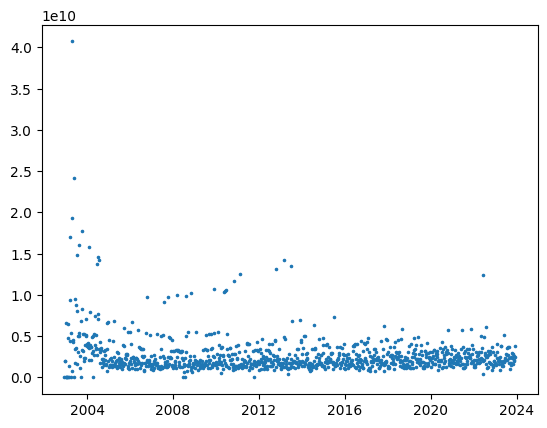

In [296]:
plt.scatter(df['Date'],df['1st Place Prize'],s=2.5)

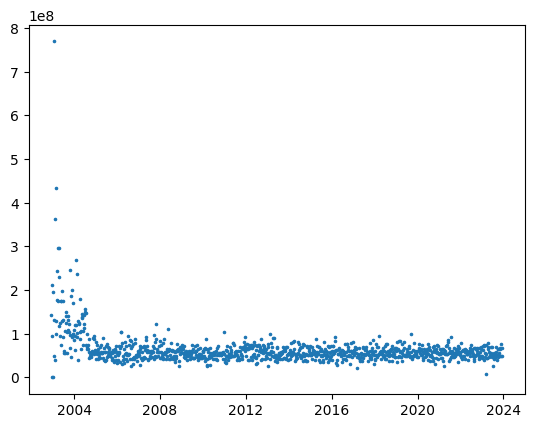

In [273]:
plt.scatter(df['Date'],df['2nd Place Prize'],s=2.5)

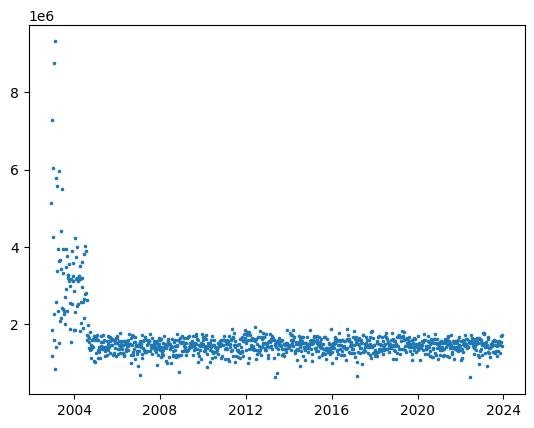

In [272]:
plt.scatter(df['Date'],df['3rd Place Prize'],s=2.5)

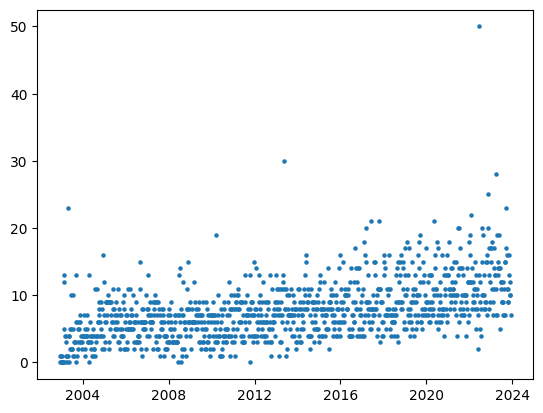

In [282]:
plt.scatter(df['Date'],df['# of 1st Place Winners'],s=5)

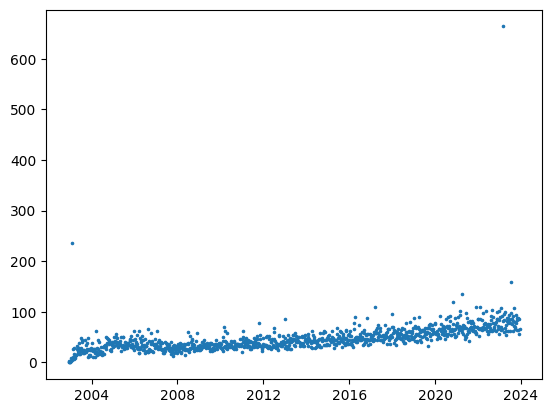

In [278]:
plt.scatter(df['Date'],df['# of 2nd Place Winners'],s=2.5)

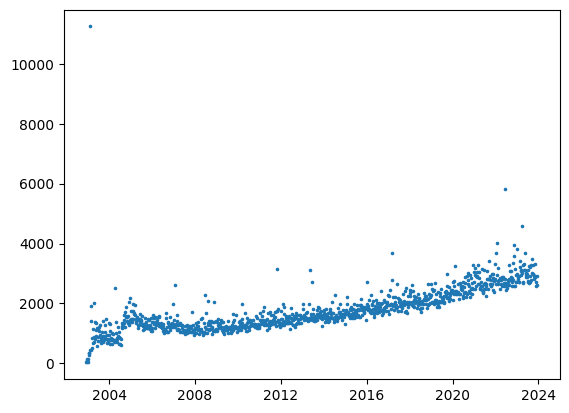

In [279]:
plt.scatter(df['Date'],df['# of 3rd Place Winners'],s=2.5)


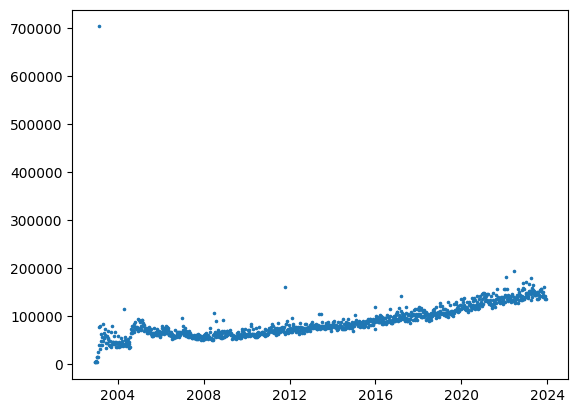

In [280]:
plt.scatter(df['Date'],df['# of 4th Place Winners'],s=2.5)

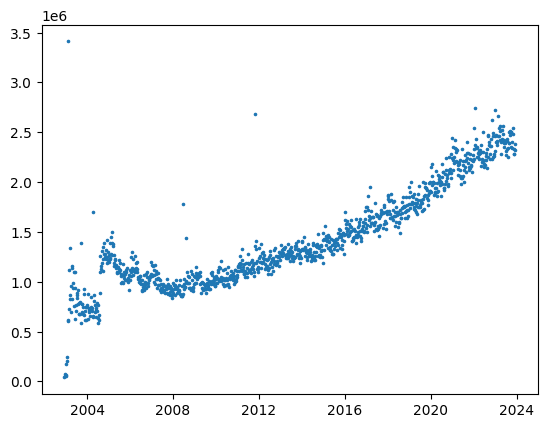

In [281]:
plt.scatter(df['Date'],df['# of 5th Place Winners'],s=2.5)